In [ ]:
import matplotlib.pyplot as plt

import database as db

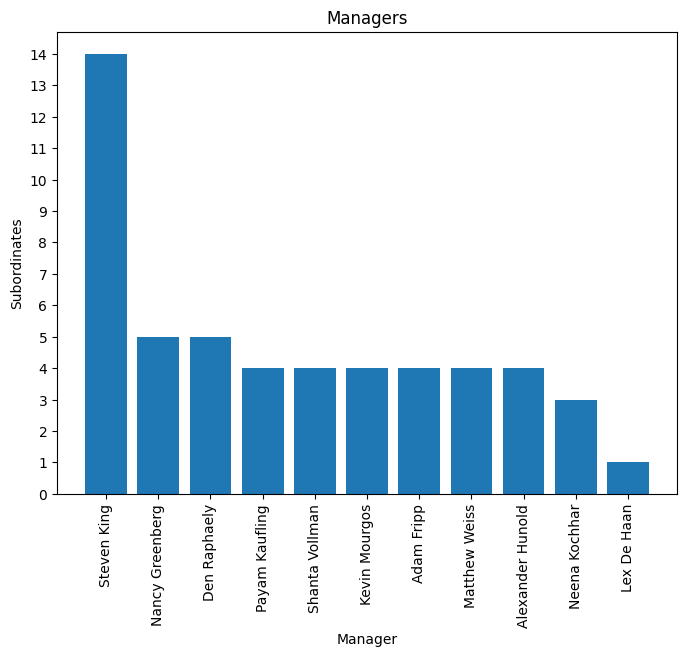

In [3]:
res = await db.execute("""
    select
        first_name ||' '|| last_name as manager,
        (select count(manager_id) from employees where manager_id = e.employee_id) as subordinates_count
    from employees e
    group by e.employee_id, manager
    order by subordinates_count desc;
""")

data = [it for it in res.fetchall() if it[1] > 0]
x = [it[0] for it in data]
y = [it[1] for it in data]

plt.figure(figsize=(8, 6))
plt.yticks(range(y[0] + 1))
plt.tick_params(axis='x',rotation=90)

plt.title("Managers")
plt.xlabel("Manager")
plt.ylabel("Subordinates")

plt.bar(x, y)
plt.show()

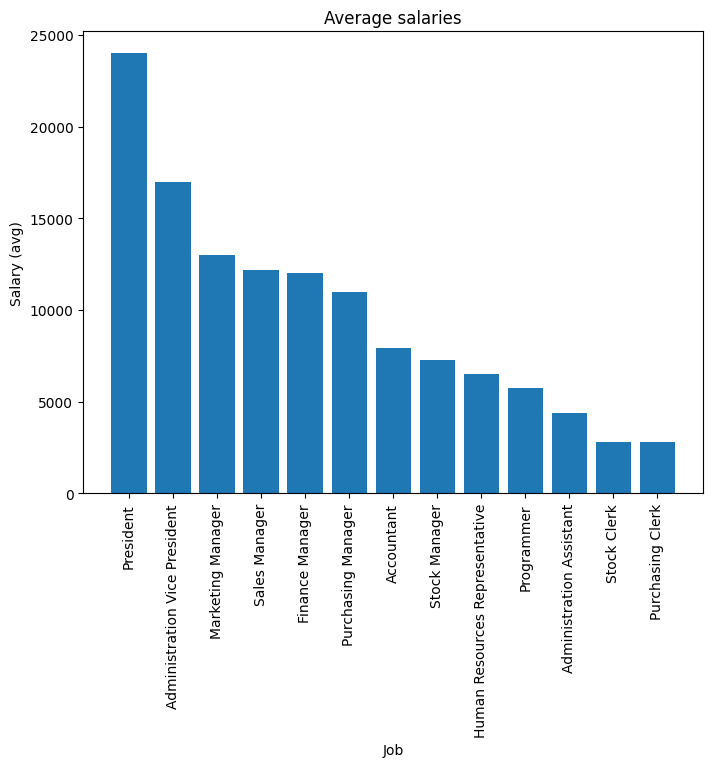

In [6]:
res = await db.execute("""
    select job_title, avg(salary) as salary_avg
    from employees
    join jobs using(job_id)
    group by job_title
    order by salary_avg desc;
""")

data = res.fetchall()
x = [it[0] for it in data]
y = [it[1] for it in data]

plt.figure(figsize=(8, 6))
plt.tick_params(axis='x',rotation=90)

plt.title("Average salaries")
plt.xlabel("Job")
plt.ylabel("Salary (avg)")

plt.bar(x, y)
plt.show()

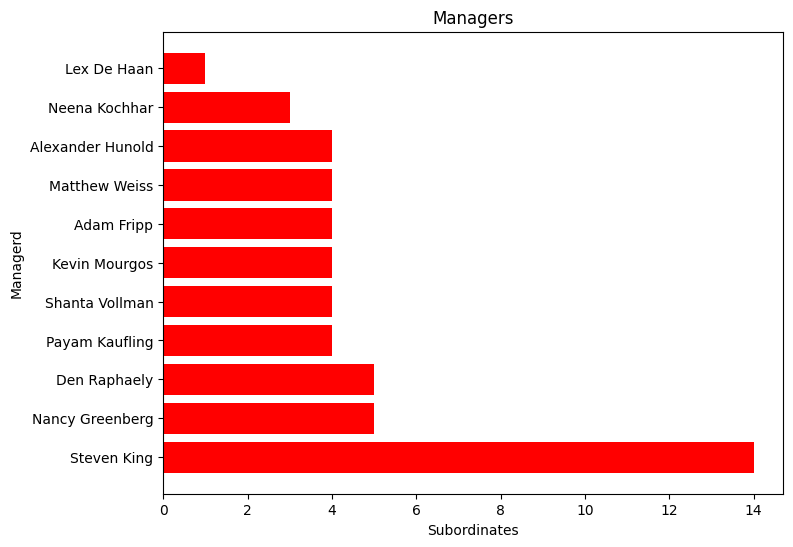

In [ ]:
res = await db.execute("""
    select
        first_name ||' '|| last_name as manager,
        (select count(manager_id) from employees where manager_id = e.employee_id) as subordinates_count
    from employees e
    group by e.employee_id, manager
    order by subordinates_count desc;
""")

data = [it for it in res.fetchall() if it[1] > 0]
x = [it[0] for it in data]
y = [it[1] for it in data]

plt.figure(figsize=(8, 6))

plt.yticks(range(y[0] + 1))

plt.title("Managers")
plt.xlabel("Subordinates")
plt.ylabel("Managerd")

plt.barh(x, y, color="red")
plt.show()

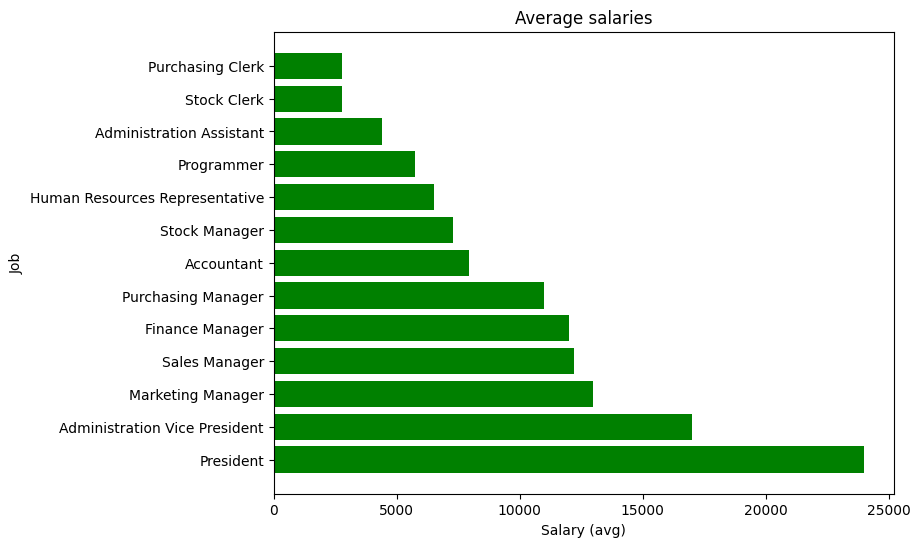

In [11]:
res = await db.execute("""
    select job_title, avg(salary) as salary_avg
    from employees
    join jobs using(job_id)
    group by job_title
    order by salary_avg desc;
""")

data = res.fetchall()
x = [it[0] for it in data]
y = [it[1] for it in data]

plt.figure(figsize=(8, 6))

plt.title("Average salaries")
plt.xlabel("Salary (avg)")
plt.ylabel("Job")

plt.barh(x, y, color="green")
plt.show()

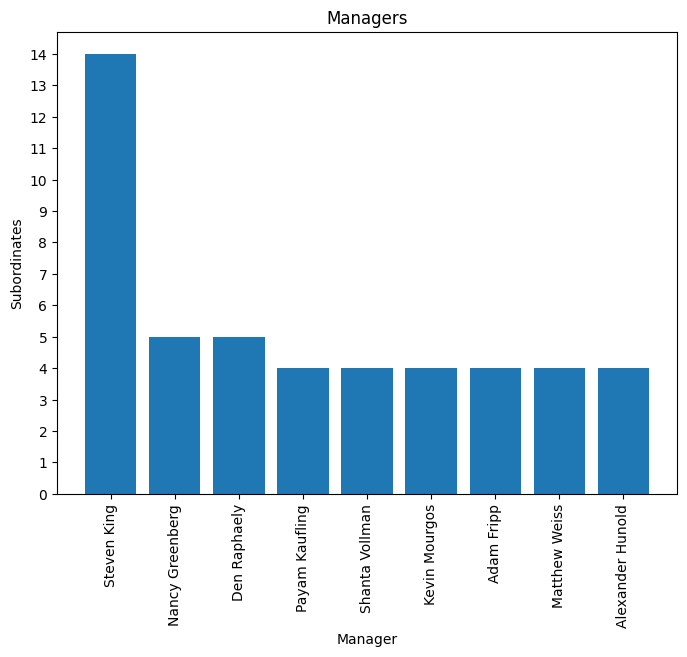

In [17]:
res = await db.execute("""
    select
        first_name ||' '|| last_name as manager,
        (select count(manager_id) from employees where manager_id = e.employee_id) as subordinates_count
    from employees e
    group by e.employee_id, manager
    order by subordinates_count desc;
""")

data = [it for it in res.fetchall() if it[1] > 3]
x = [it[0] for it in data]
y = [it[1] for it in data]

plt.figure(figsize=(8, 6))
plt.yticks(range(y[0] + 1))
plt.tick_params(axis='x',rotation=90)

plt.title("Managers")
plt.xlabel("Manager")
plt.ylabel("Subordinates")

plt.bar(x, y)
plt.show()

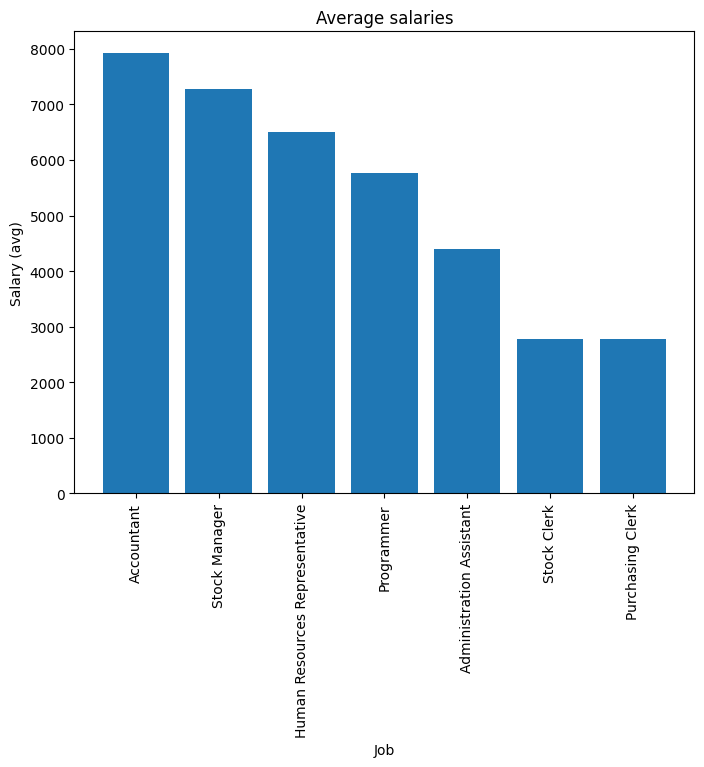

In [19]:
res = await db.execute(
    """
    select job_title, avg(salary) as salary_avg
    from employees
    join jobs using(job_id)
    group by job_title
    having avg(salary) between :min_salary and :max_salary
    order by salary_avg desc;
    """,
    min_salary=1000,
    max_salary=10000,
)

data = res.fetchall()
x = [it[0] for it in data]
y = [it[1] for it in data]

plt.figure(figsize=(8, 6))
plt.tick_params(axis='x',rotation=90)

plt.title("Average salaries")
plt.xlabel("Job")
plt.ylabel("Salary (avg)")

plt.bar(x, y)
plt.show()

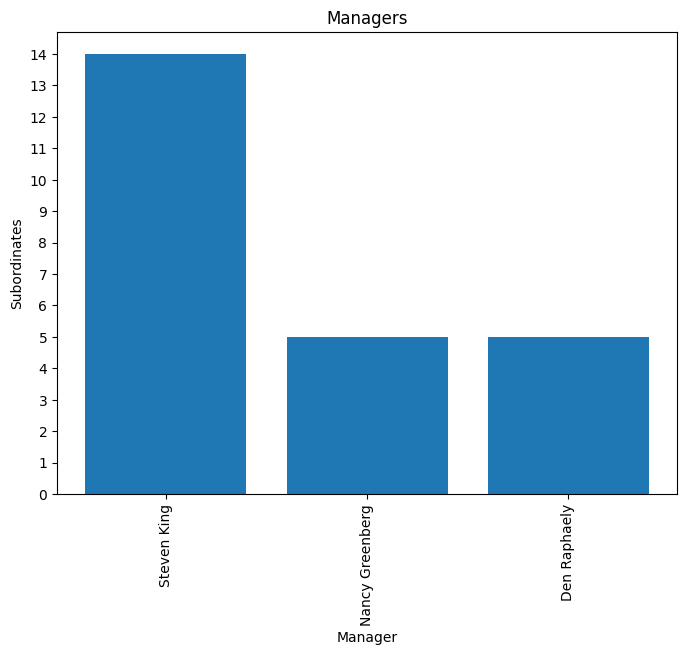

In [23]:
async def draw_managers(min_subordinates: int) -> None:
    res = await db.execute("""
        select
            first_name ||' '|| last_name as manager,
            (select count(manager_id) from employees where manager_id = e.employee_id) as subordinates_count
        from employees e
        group by e.employee_id, manager
        order by subordinates_count desc;
    """)

    data = [it for it in res.fetchall() if it[1] > min_subordinates]
    x = [it[0] for it in data]
    y = [it[1] for it in data]

    plt.figure(figsize=(8, 6))
    plt.yticks(range(y[0] + 1))
    plt.tick_params(axis='x',rotation=90)

    plt.title("Managers")
    plt.xlabel("Manager")
    plt.ylabel("Subordinates")

    plt.bar(x, y)
    plt.show()


await draw_managers(4)

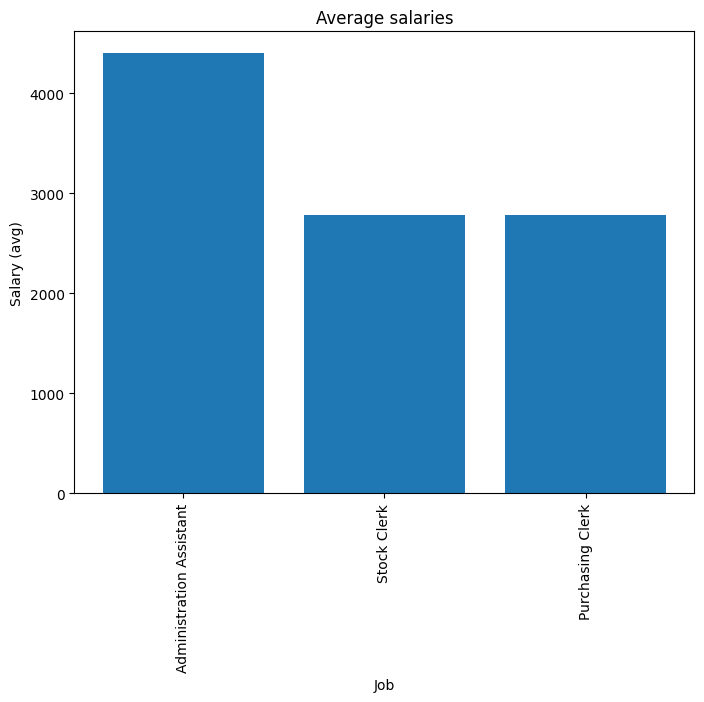

In [21]:
async def draw_avg_salary(min_salary: int, max_salary: int) -> None:
    res = await db.execute(
        """
        select job_title, avg(salary) as salary_avg
        from employees
        join jobs using(job_id)
        group by job_title
        having avg(salary) between :min_salary and :max_salary
        order by salary_avg desc;
        """,
        min_salary=min_salary,
        max_salary=max_salary,
    )

    data = res.fetchall()
    x = [it[0] for it in data]
    y = [it[1] for it in data]

    plt.figure(figsize=(8, 6))
    plt.tick_params(axis='x',rotation=90)

    plt.title("Average salaries")
    plt.xlabel("Job")
    plt.ylabel("Salary (avg)")

    plt.bar(x, y)
    plt.show()


await draw_avg_salary(2000, 5000)

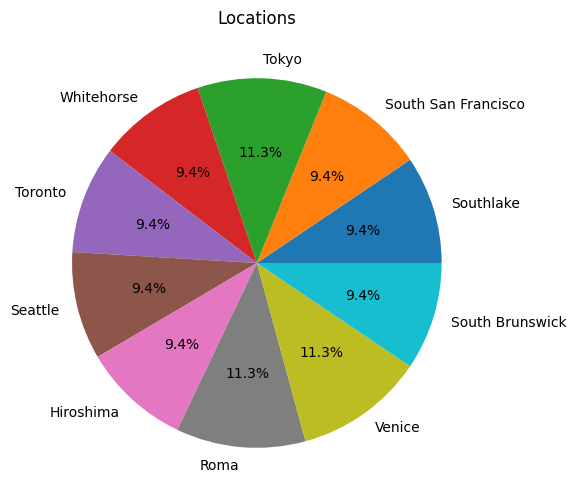

In [29]:
res = await db.execute("""
    select city, count(employee_id) as employees_count
    from employees
    join locations using(location_id)
    group by city;
""")

data = res.fetchall()
x = [it[0] for it in data]
y = [it[1] for it in data]

plt.figure(figsize=(8, 6))
plt.tick_params(axis='x',rotation=90)

plt.title("Locations")

plt.pie(y, labels=x, autopct="%1.1f%%")
plt.show()